# Задание 1**
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

## скачаем и распакуем данные

In [1]:
!wget https://u.netology.ngcdn.ru/backend/uploads/lms/attachments/files/data/15257/ml-latest-small.zip

--2022-01-06 21:22:08--  https://u.netology.ngcdn.ru/backend/uploads/lms/attachments/files/data/15257/ml-latest-small.zip
Resolving u.netology.ngcdn.ru (u.netology.ngcdn.ru)... 104.22.40.115, 104.22.41.115, 172.67.26.246, ...
Connecting to u.netology.ngcdn.ru (u.netology.ngcdn.ru)|104.22.40.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2149503 (2.0M) [application/x-zip-compressed]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>]   2.05M  --.-KB/s    in 0.06s   

2022-01-06 21:22:09 (33.6 MB/s) - ‘ml-latest-small.zip.1’ saved [2149503/2149503]



In [2]:
!unzip /content/ml-latest-small.zip

Archive:  /content/ml-latest-small.zip
replace ml-latest-small/ad_campaigns.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-latest-small/ad_campaigns.xlsx  
  inflating: ml-latest-small/keywords.csv  
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/movies.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/tags.csv  


## Расчет

In [3]:
import pandas as pd

In [4]:
rating_df = pd.read_csv('/content/ml-latest-small/ratings.csv')
rating_df.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [5]:

def assign_rating(rating):
  '''
    функция классифицирует фильмы на три категории 
    Low, Average и High в зависимости от значения rating
  '''
  if rating <= 2:
    return 'Low rating'
  elif  rating <= 4:
    return 'Average rating'
  else:
    return 'High rating'

In [6]:
rating_df['rating_level'] = rating_df['rating'].apply(assign_rating)
rating_df['rating_level'].value_counts()

Average rating    63801
High rating       22818
Low rating        13385
Name: rating_level, dtype: int64

# Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.


Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [7]:
keyword_df = pd.read_csv('/content/ml-latest-small/keywords.csv')
keyword_df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [8]:
center = ['москва', 'тула', 'ярославль']
north_west = ['петербург', 'псков', 'мурманск']
far_east = ['владивосток', 'сахалин', 'хабаровск']

In [9]:
def assign_region(keyword):
   keywords = keyword.lower().split()
   for key in keywords:
      if key in center:
          return 'Центр'
      elif key in north_west:
          return 'Северо-Запад'
      elif key in far_east:
          return 'Дальний Восток'
      else:
          return 'undefined'

In [10]:
keyword_df['region'] = keyword_df['keyword'].apply(assign_region)
keyword_df['region'].value_counts()

undefined         99956
Центр                34
Северо-Запад          5
Дальний Восток        5
Name: region, dtype: int64

### Мини-проверка

In [11]:
keyword_df[keyword_df['region'] == 'Центр']

,keyword,shows,region
1259,москва,153050,Центр
5983,москва третий рим,43182,Центр
6075,ярославль,41720,Центр
6999,москва 24,37459,Центр
7103,москва сити,37022,Центр
7339,москва слезам не верит,35857,Центр
8132,москва погода,151701,Центр
11785,тула,23898,Центр
16175,москва слезам не верит смотреть в хорошем каче...,18407,Центр
18843,москва фм,16400,Центр


In [12]:
keyword_df[keyword_df['region'] == 'Дальний Восток']

,keyword,shows,region
5858,владивосток,43038,Дальний Восток
9084,хабаровск,29655,Дальний Восток
21445,сахалин,14494,Дальний Восток
38863,владивосток время,14794,Дальний Восток
46720,хабаровск время,10777,Дальний Восток


# Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

    В переменную years запишите список из всех годов с 1950 по 2010.

    Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
        для каждой строки пройдите по всем годам списка years
        если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
        если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

    Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

    Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

P/S/ все файлы находятся в архиве «дополнительные файлы к лекции и дз»

Важно! При копировании юпитер ноутбука изменяет кавычки ’ на ` , что может способствовать ошибки в коде. В данной ситуации необходимо их просто заменить.

## Загрузка данных 

In [13]:
rating_df = pd.read_csv('/content/ml-latest-small/ratings.csv')
rating_df.drop(["userId","timestamp"], axis=1, inplace=True)
rating_df.tail()



,movieId,rating
99999,6268,2.5
100000,6269,4.0
100001,6365,4.0
100002,6385,2.5
100003,6565,3.5


In [14]:
movies_df = pd.read_csv('/content/ml-latest-small/movies.csv')
movies_df.drop(["genres"], axis=1, inplace=True) 
movies_df.tail()

,movieId,title
9120,162672,Mohenjo Daro (2016)
9121,163056,Shin Godzilla (2016)
9122,163949,The Beatles: Eight Days a Week - The Touring Y...
9123,164977,The Gay Desperado (1936)
9124,164979,"Women of '69, Unboxed"


## Агрегируем rating_df по movieId и находим среднее значение столбца rating  

In [15]:
aggregated_mean_rating = rating_df.groupby(by='movieId').mean()
aggregated_mean_rating.columns = ['mean_rating']
aggregated_mean_rating.head(10)

,mean_rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
6,3.884615
7,3.283019
8,3.800000
9,3.150000


## объеденям две таблицы 

In [16]:
joined_df = aggregated_mean_rating.join(movies_df.set_index('movieId'), on='movieId', how='left')
joined_df

,mean_rating,title
movieId,,
1,3.872470,Toy Story (1995)
2,3.401869,Jumanji (1995)
3,3.161017,Grumpier Old Men (1995)
4,2.384615,Waiting to Exhale (1995)
5,3.267857,Father of the Bride Part II (1995)
...,...,...
161944,5.000000,The Last Brickmaker in America (2001)
162376,4.500000,Stranger Things
162542,5.000000,Rustom (2016)


## функция для выделения даты в строке и ее проверка 

In [17]:
import numpy as np
# years_list = np.arange(1950,2011,1)
# Если смотреть с 1900 года кажется более наглядным график
years_list = np.arange(1900,2011,1)
import re 
def production_year(title):
  year = re.findall(r'\(\d{4}-?\d*\)',title)
  if year:
    if int(year[0][1:5]) in years_list:
      return int(year[0][1:5])
  return 1900
  

In [18]:
text ='Fawlty Towers (1975-1979)'
production_year(text)

1975

In [19]:
text ='the house of 1000 corpses (2003)'
production_year(text)

2003

In [20]:
text ='(6000 the (100) house 4000) of 1000 corpses (2003)'
production_year(text)

2003

In [21]:
text ='(6000 the (100) house 4000) of 1000 corpses (1949)'
production_year(text)

1949

## Добавили колонку year в объедененный joined_df 

In [22]:
joined_df['year'] = joined_df['title'].apply(production_year)
joined_df.head()

,mean_rating,title,year
movieId,,,
1,3.872470,Toy Story (1995),1995
2,3.401869,Jumanji (1995),1995
3,3.161017,Grumpier Old Men (1995),1995
4,2.384615,Waiting to Exhale (1995),1995
5,3.267857,Father of the Bride Part II (1995),1995


## удаление ненужной для анализа колонки

In [23]:
joined_df.drop(["title"], axis=1, inplace=True)
joined_df

,mean_rating,year
movieId,,
1,3.872470,1995
2,3.401869,1995
3,3.161017,1995
4,2.384615,1995
5,3.267857,1995
...,...,...
161944,5.000000,2001
162376,4.500000,1900
162542,5.000000,1900


## Группируем joined_df по year и посчитаем среднее значение рейтинга фильмов по годам

In [24]:
result_df=joined_df.groupby(by = 'year').mean().reset_index()
result_df

,year,mean_rating
0,1900,3.073557
1,1902,4.333333
2,1915,3.000000
3,1916,3.500000
4,1917,4.250000
...,...,...
93,2006,3.265219
94,2007,3.380247
95,2008,3.237304
96,2009,3.212108


## линейная аппроксимация 

In [25]:
import numpy as np
from matplotlib import pyplot as plt

m, c = np.polyfit(result_df.year,result_df.mean_rating,1) 

def line_oprox(x):
 return m*x + c

y =  line_oprox(result_df.year)


## Построим графики 


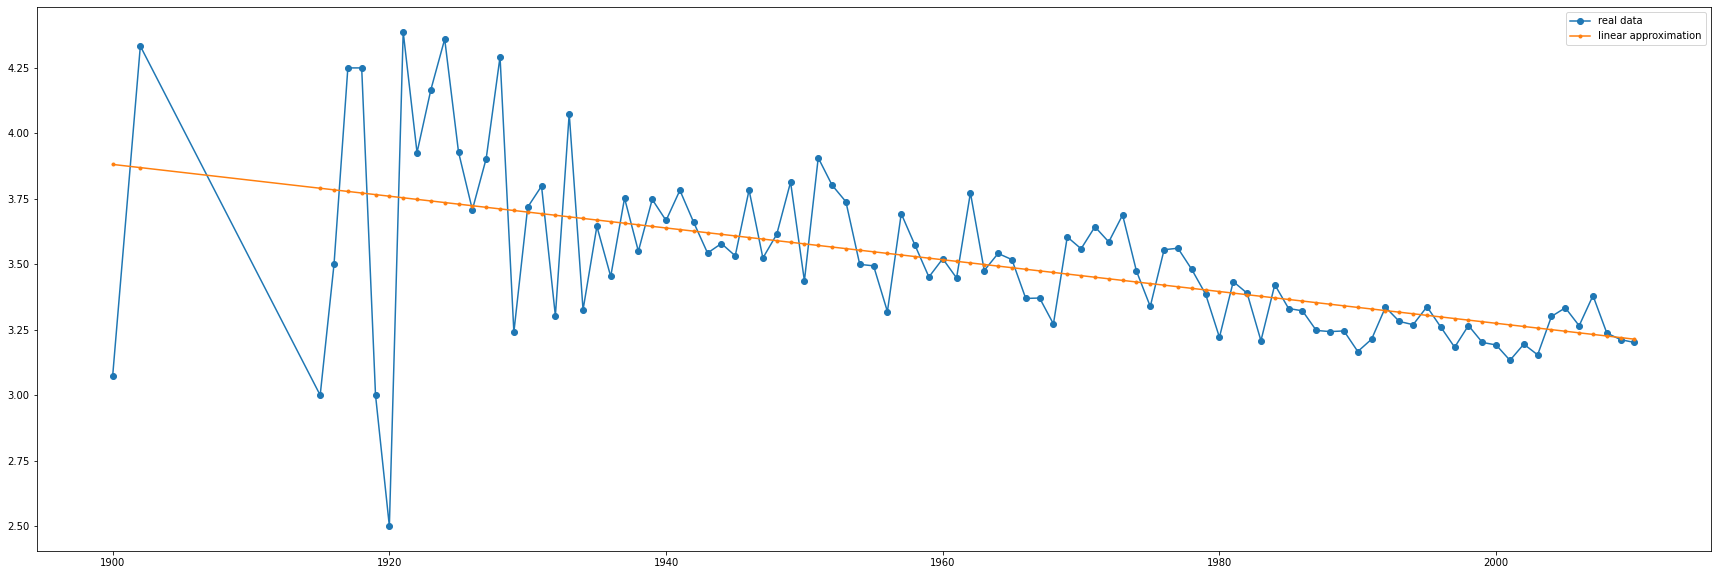

In [26]:
plt.figure(figsize = (30,10))
plt.plot(result_df.year,result_df.mean_rating, marker='o', label="real data")
plt.plot(result_df.year,y, marker='.', label="linear approximation")
plt.legend()
plt.show()

# Mean Squared Error

In [27]:
np.square(np.subtract(y, result_df.mean_rating)).mean()

0.07511452599170326